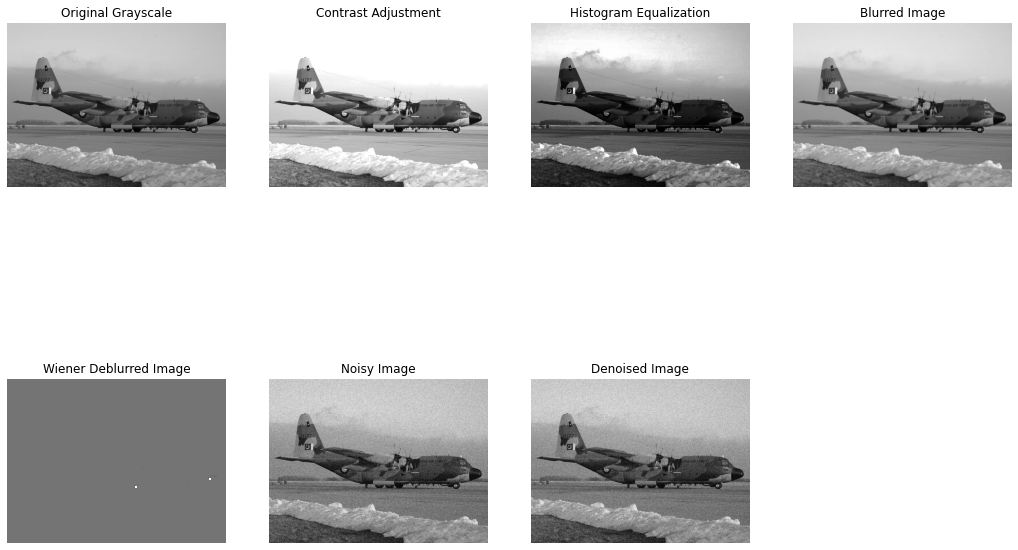

In [3]:
import cv2
import numpy as np
from scipy.signal import wiener
import matplotlib.pyplot as plt

# Re-initialize the image path due to reset
image_path = 'c130.jpg'

# Image Acquisition
original_image = cv2.imread(image_path)
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Image Enhancement
# Contrast Adjustment
alpha = 1.5 # Contrast control (1.0-3.0)
beta = 0    # Brightness control (0-100)
contrast_enhanced_image = cv2.convertScaleAbs(gray_image, alpha=alpha, beta=beta)

# Histogram Equalization
histogram_equalized_image = cv2.equalizeHist(gray_image)

# Image Restoration
# Adding synthetic blur for demonstration
kernel_size = (5, 5)
blur_image = cv2.GaussianBlur(gray_image, kernel_size, sigmaX=0)

# Deblurring using Wiener filter
# Note: Wiener filter may produce a warning but it will work
deblurred_image = wiener(blur_image, (5, 5))

# Adding synthetic noise for demonstration
noise_sigma = 25
noise = np.random.randn(*gray_image.shape) * noise_sigma
noisy_image = np.clip(gray_image + noise, 0, 255)  # Clipping to maintain valid intensity range

# Denoising
denoised_image = cv2.fastNlMeansDenoising(np.uint8(noisy_image), None, 10, 7, 21)

# Displaying all the images side by side for comparison
images = [gray_image, contrast_enhanced_image, histogram_equalized_image,
          blur_image, deblurred_image, noisy_image, denoised_image]
titles = ['Original Grayscale', 'Contrast Adjustment', 'Histogram Equalization',
          'Blurred Image', 'Wiener Deblurred Image', 'Noisy Image', 'Denoised Image']

plt.figure(figsize=(18, 12))
for i in range(7):
    plt.subplot(2, 4, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.show()


In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the pre-trained model and its weights
net = cv2.dnn.readNetFromCaffe('MobileNetSSD_deploy.prototxt.txt', 'MobileNetSSD_deploy.caffemodel')

# Load the class labels MobileNet SSD was trained to detect
CLASSES = ["background", "aeroplane", "bicycle", "bird", "boat",
           "bottle", "bus", "car", "cat", "chair", "cow", "diningtable",
           "dog", "horse", "motorbike", "person", "pottedplant", "sheep",
           "sofa", "train", "tvmonitor"]
def detect_objects(image_path):
    # Load the image from the path
    image = cv2.imread(image_path)
    (h, w) = image.shape[:2]

    # Convert the image to a blob and pass the blob through the network
    blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 0.007843, (300, 300), 127.5)
    net.setInput(blob)
    detections = net.forward()

    # Loop over the detections
    for i in np.arange(0, detections.shape[2]):
        # Extract the confidence of the detection
        confidence = detections[0, 0, i, 2]

        # Filter out weak detections by ensuring the confidence is greater than a threshold
        if confidence > 0.2:
            # Extract the index of the class label from the detection
            idx = int(detections[0, 0, i, 1])

            # Compute the coordinates of the bounding box for the object
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (startX, startY, endX, endY) = box.astype("int")

            # Draw the bounding box around the detected object on the image
            label = "{}: {:.2f}%".format(CLASSES[idx], confidence * 100)
            cv2.rectangle(image, (startX, startY), (endX, endY), (23, 230, 210), 2)
            y = startY - 15 if startY - 15 > 15 else startY + 15
            cv2.putText(image, label, (startX, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (23, 230, 210), 2)
    
    return image
# Image path
image_path = 'c130.jpg'

# Detect objects in the image
output_image = detect_objects(image_path)

# Display the images
plt.figure(figsize=(15, 8))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Detected Image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.title('Detected Objects')
plt.axis('off')

plt.show()


error: OpenCV(4.5.4) /tmp/pip-req-build-th1mncc2/opencv/modules/dnn/src/caffe/caffe_io.cpp:1126: error: (-2:Unspecified error) FAILED: fs.is_open(). Can't open "MobileNetSSD_deploy.prototxt.txt" in function 'ReadProtoFromTextFile'
